In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Create a small csv file 

# df = pd.read_csv('vehicles.csv')
# df2 = df.sample(frac = 0.02, random_state = 23).reset_index(drop = True)
# print(df2.shape)
# df2.head()
# df2.to_csv('vehicles_short.csv', index = False)

In [3]:
d = pd.read_csv('vehicles_short.csv')

In [4]:
d.shape

(10795, 25)

In [5]:
d.isnull().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               20
manufacturer      483
model             158
condition        4751
cylinders        4370
fuel               70
odometer         1996
title_status       52
transmission       73
vin              4554
drive            3069
size             7425
type             3011
paint_color      3475
image_url           0
description         0
county          10795
state               0
lat               183
long              183
dtype: int64

In [6]:
d.head()

id                                                url  \
0  7092178344  https://sandiego.craigslist.org/ssd/ctd/d/chul...   
1  7091179511  https://littlerock.craigslist.org/ctd/d/clinto...   
2  7082782798  https://northmiss.craigslist.org/ctd/d/ripley-...   
3  7087789940  https://fargo.craigslist.org/ctd/d/wadena-2014...   
4  7075727992  https://newhaven.craigslist.org/ctd/d/oakville...   

              region                         region_url  price    year  \
0          san diego    https://sandiego.craigslist.org   4999  2007.0   
1        little rock  https://littlerock.craigslist.org  48647  2020.0   
2  north mississippi   https://northmiss.craigslist.org  15272  2018.0   
3   fargo / moorhead       https://fargo.craigslist.org  20770  2014.0   
4          new haven    https://newhaven.craigslist.org  20375  2015.0   

  manufacturer                     model condition    cylinders  ... drive  \
0       toyota              prius hybrid  like new  4 cylinders  ...   fwd   
1    chevrolet          silverado 2500hd       NaN          NaN  ...   4wd   
2       subaru                    legacy       NaN          NaN  ...   NaN   
3    chevrolet            silverado 1500       NaN          NaN  ...   NaN   
4       toyota  highlander awd 4dr v6 xl       NaN  6 cylinders  ...   4wd   

       size       type paint_color  \
0  mid-size  hatchback         red   
1       NaN     pickup         NaN   
2       NaN      sedan       white   
3       NaN     pickup       white   
4       NaN        SUV         NaN   

                                           image_url  \
0  https://images.craigslist.org/00E0E_7pUwTeGive...   
1  https://images.craigslist.org/00707_2avrve6Lwj...   
2  https://images.craigslist.org/00G0G_bH6M7bHpTp...   
3  https://images.craigslist.org/00Y0Y_bTlYzflWb8...   
4  https://images.craigslist.org/01010_guoOa5NjDS...   

                                         description county state      lat  \
0  - 2007 Toyota Prius Hybrid Hatchback 4-door - ...    NaN    ca  32.6173   
1  ➔ Want to see more pictures?Paste this link to...    NaN    ar  38.4018   
2  2018 *Subaru* *Legacy* *2.5i* *4D Sedan*.Call ...    NaN    ms  34.7584   
3  14 Chevrolet Silverado 1500 4x4 Crew Cab Picku...    NaN    mn  46.4500   
4  Highline Car Connection Veteran Owned & Operat...    NaN    ct  41.5864   

       long  
0 -117.0840  
1  -93.7850  
2  -88.9401  
3  -95.1247  
4  -73.0805  

[5 rows x 25 columns]

### 1. Identify features

* Drop ***'id', 'url', 'region_url', 'image_url'*** because they do not give out much info
* Drop ***'county', 'size'*** because a lot of values are nan
* Drop ***'long', 'lat'*** because they indicate 'region'
* Drop ***'description'***, for now. May use it later

In [7]:
#Try drop some columns:
col_to_drop = ['id', 'url', 'region_url', 'image_url', 
               'county', 'long', 'lat', 'size', 'description']

cols = ['region', 'price', 'year', 'manufacturer', 'model', 'condition',\
       'cylinders', 'fuel', 'odometer','title_status', 'transmission',\
       'vin','drive', 'type', 'paint_color', 'state']

desc = d['description']

print(len(col_to_drop))
print(len(cols))


9
16


In [8]:
df = d.drop(columns = col_to_drop, axis = 1)
df.shape

(10795, 16)

In [9]:
cat_col = ['region', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'vin',
       'drive', 'type', 'paint_color', 'state']

num_col = ['price', 'year','odometer']

In [10]:
fea = df[cat_col].nunique()
print(fea)

# multiple_cat = (fea[fea.values>=20].index).tolist()
# simple_cat = (fea[fea.values<20].index).tolist()

# print('Multiple cat: ', multiple_cat)
# print('Simple cat: ', simple_cat)

region           391
manufacturer      38
model           3502
condition          6
cylinders          8
fuel               5
title_status       6
transmission       3
vin             6061
drive              3
type              13
paint_color       12
state             51
dtype: int64


* Drop ***'model'*** because too many values cannot be processed
* Try dropping ***'region'***, may use this later
* Process ***'vin'*** : 0 if there's no vin and 1 if there's vin

In [11]:
region = df['region']
df = df.drop(columns = ['model', 'region'], axis = 1)
df.shape

(10795, 14)

In [12]:
cat_col = ['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'vin',
       'drive', 'type', 'paint_color', 'state']

num_col = ['price', 'year','odometer']

In [13]:
#process vin into 1 if vehicle has a vin and 0 otherwise
df['vin'] = df['vin'].fillna(0)
df['vin'] = df['vin'].apply(lambda x: 0 if x == 0 else 1)
df['vin'].value_counts()

1    6241
0    4554
Name: vin, dtype: int64

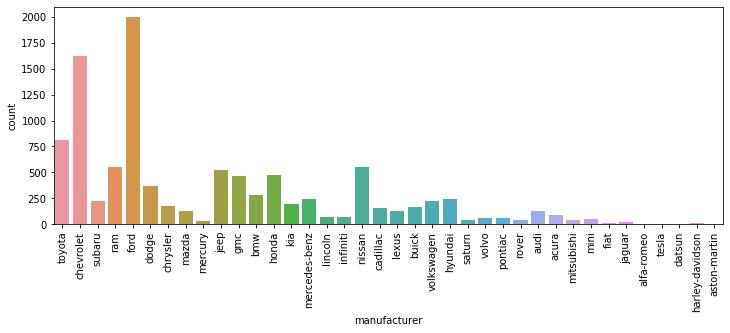

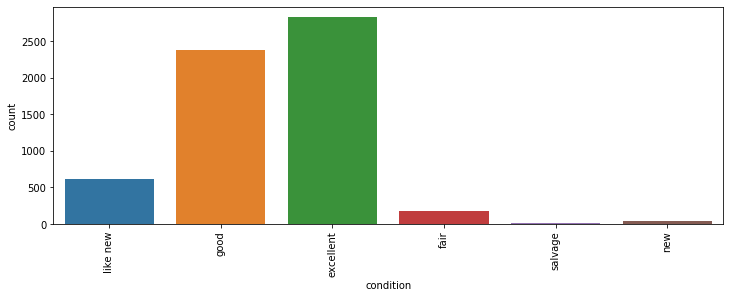

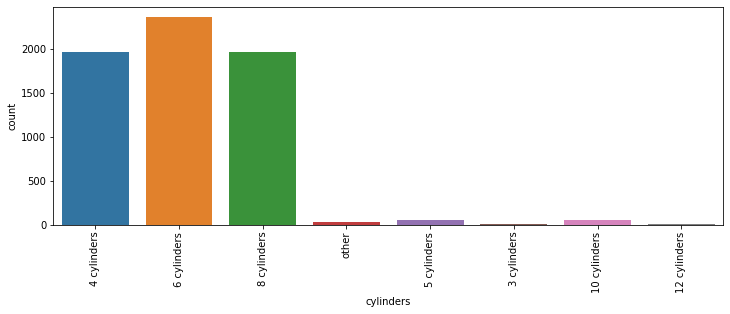

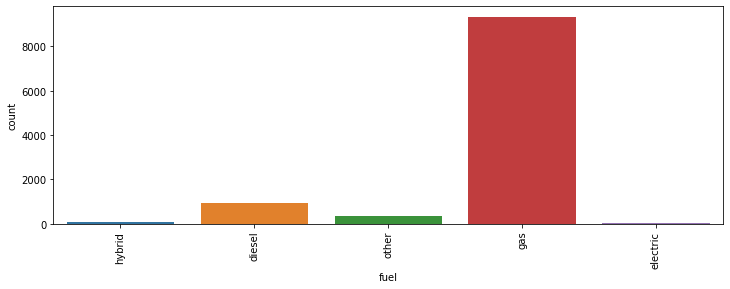

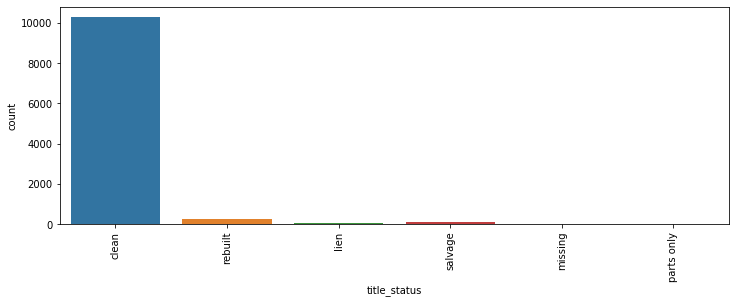

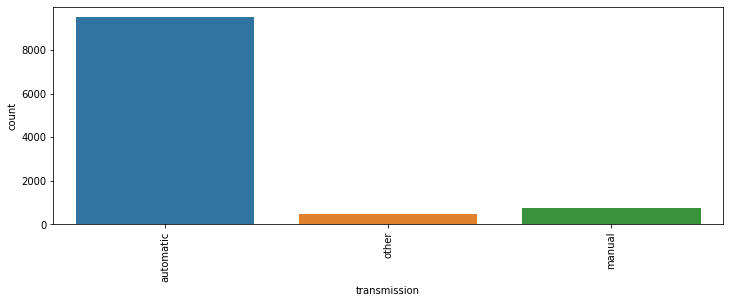

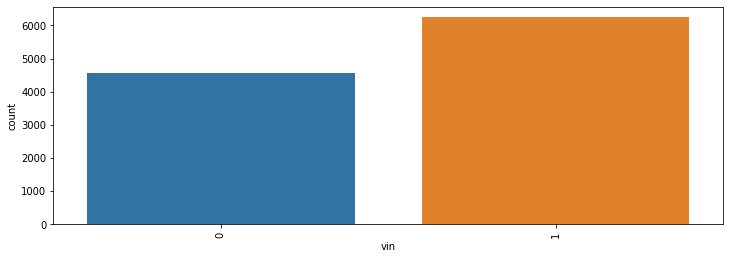

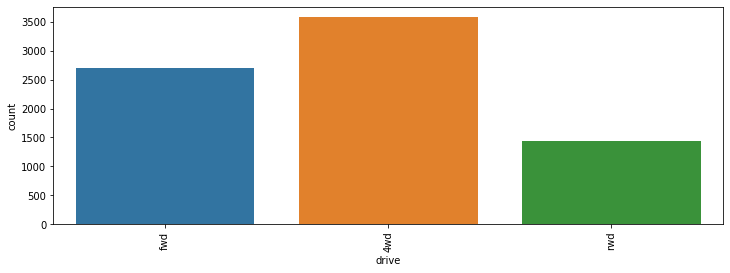

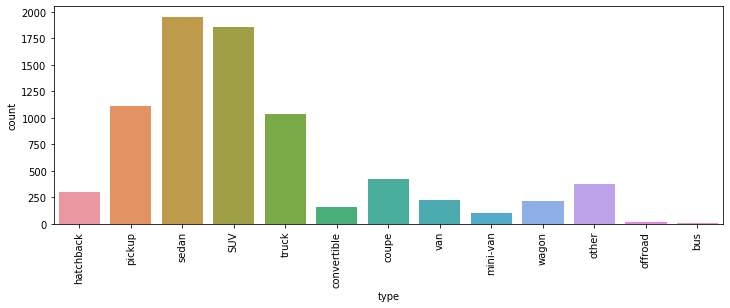

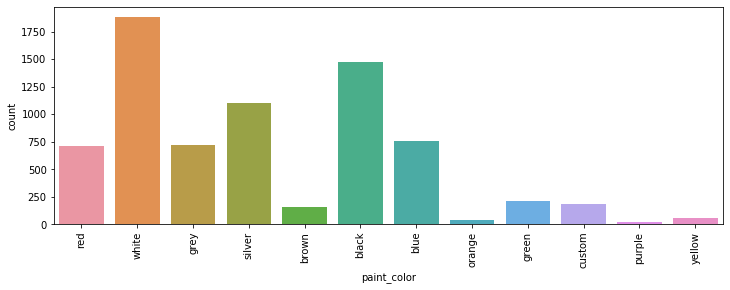

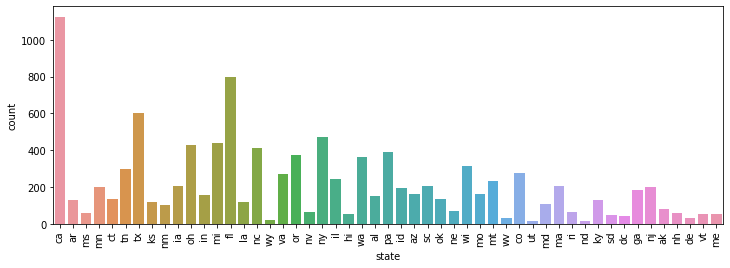

In [14]:
#Count plot for each categorical value
for cat in cat_col:
    temp = df[cat].dropna()
    fig, ax = plt.subplots(figsize = (12,4))
    g = sns.countplot(temp, ax = ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

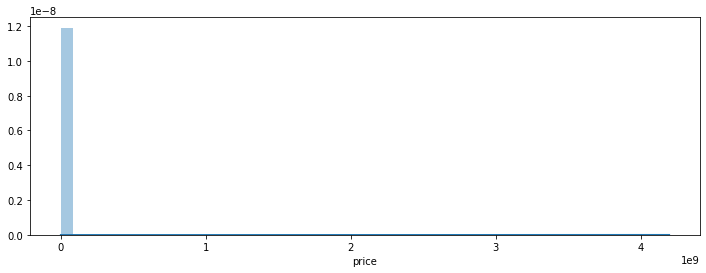

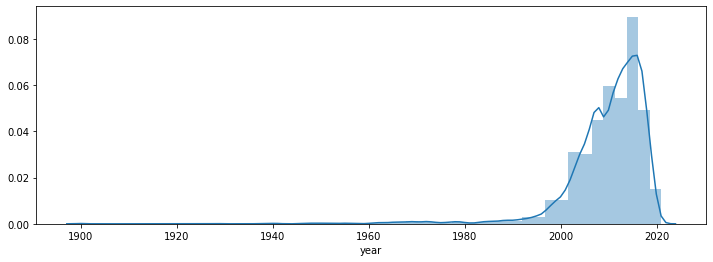

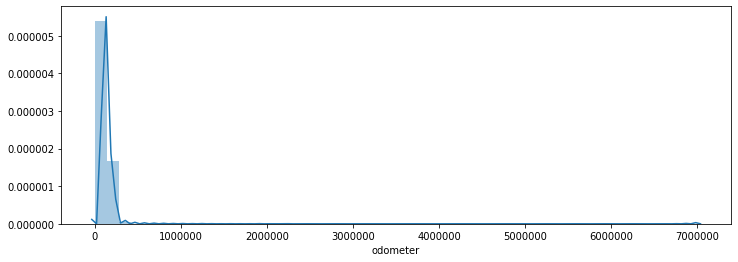

In [15]:
# process numerical features
# first visualize
for num in num_col:
    temp = df[num].dropna()
    fig, ax = plt.subplots(figsize = (12,4))
    g = sns.distplot(temp, ax = ax)
    #g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

In [16]:
for num in num_col:
    print(df[num].describe())

count    1.079500e+04
mean     4.115891e+05
std      4.042132e+07
min      0.000000e+00
25%      4.200000e+03
50%      9.000000e+03
75%      1.749500e+04
max      4.198287e+09
Name: price, dtype: float64
count    10775.000000
mean      2009.716381
std          8.871017
min       1900.000000
25%       2007.000000
50%       2012.000000
75%       2015.000000
max       2021.000000
Name: year, dtype: float64
count    8.799000e+03
mean     1.012071e+05
std      1.099437e+05
min      0.000000e+00
25%      4.683600e+04
50%      9.439700e+04
75%      1.390000e+05
max      7.000000e+06
Name: odometer, dtype: float64


In [17]:
# drop unusual old car and unusual high milage:
old = df['year']<1960
odo = df['odometer']>= 500000
pri = df['price'] >= 150000

df = df.drop(df[old | odo |pri].index).reset_index(drop = True)
df.shape
# df = df[~old & ~ odo]
# df.shape


(10725, 14)

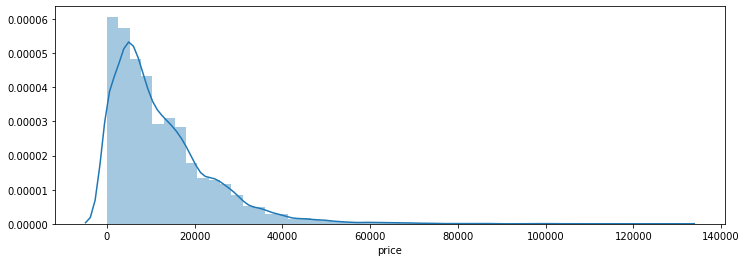

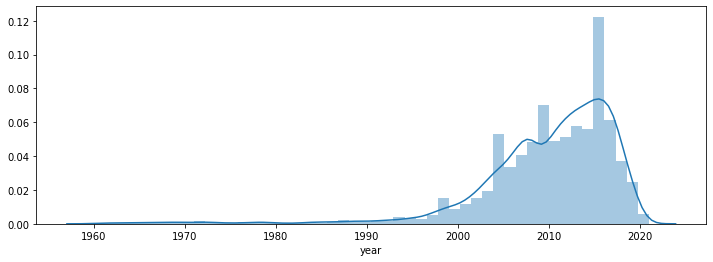

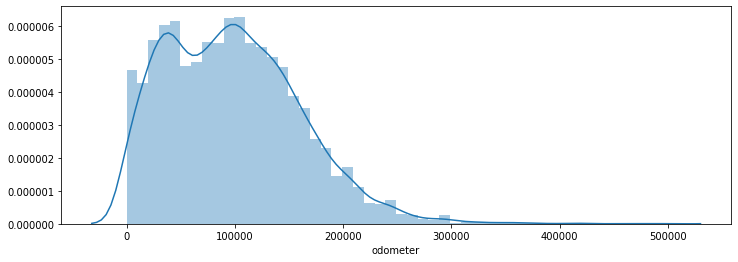

In [18]:
#Viz numeric columns again
for num in num_col:
    temp = df[num].dropna()
    fig, ax = plt.subplots(figsize = (12,4))
    g = sns.distplot(temp, ax = ax)
    #g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

In [19]:
for num in num_col:
    print(df[num].describe())

count     10725.000000
mean      12381.708159
std       11697.841418
min           0.000000
25%        4200.000000
50%        9000.000000
75%       17473.000000
max      129000.000000
Name: price, dtype: float64
count    10705.000000
mean      2009.996263
std          7.745881
min       1960.000000
25%       2007.000000
50%       2012.000000
75%       2015.000000
max       2021.000000
Name: year, dtype: float64
count      8755.000000
mean      98157.397944
std       62148.960922
min           0.000000
25%       46849.000000
50%       94256.000000
75%      138845.000000
max      498000.000000
Name: odometer, dtype: float64


(10270, 2)


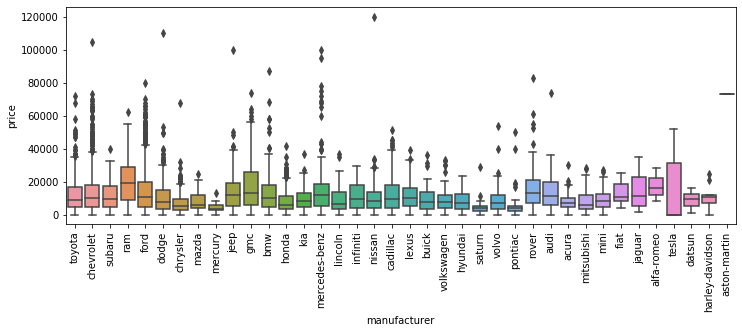

(5998, 2)


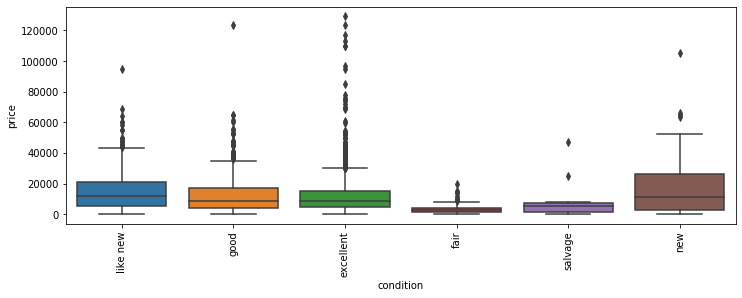

(6385, 2)


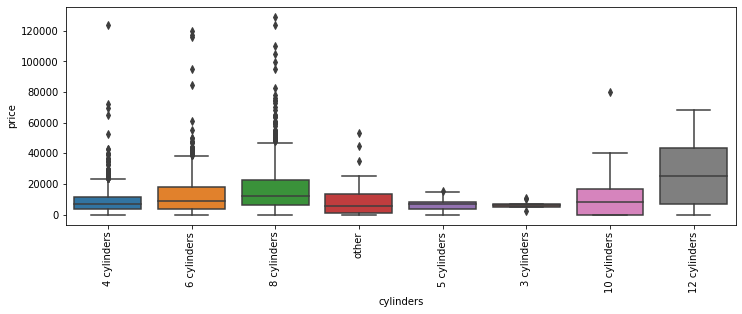

(10656, 2)


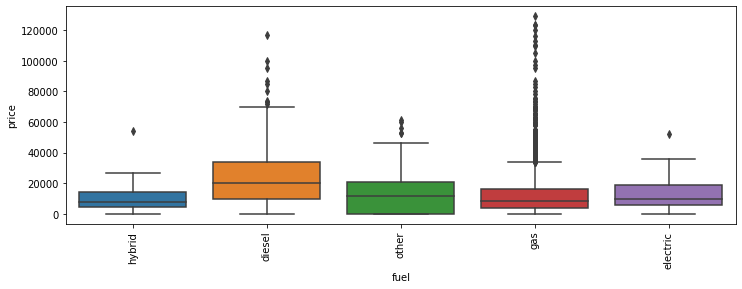

(10673, 2)


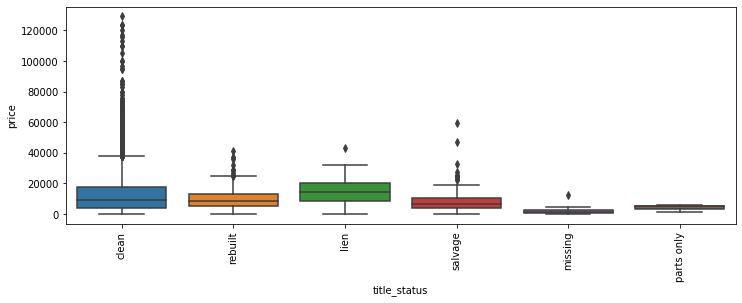

(10652, 2)


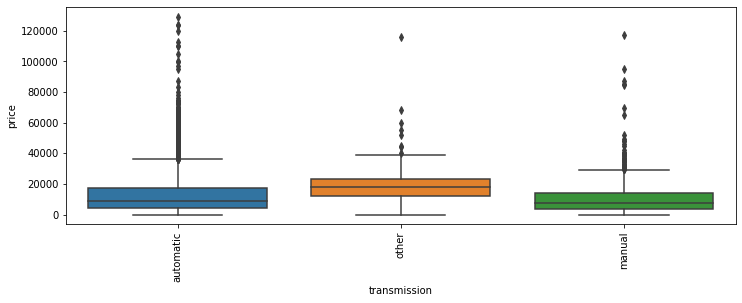

(10725, 2)


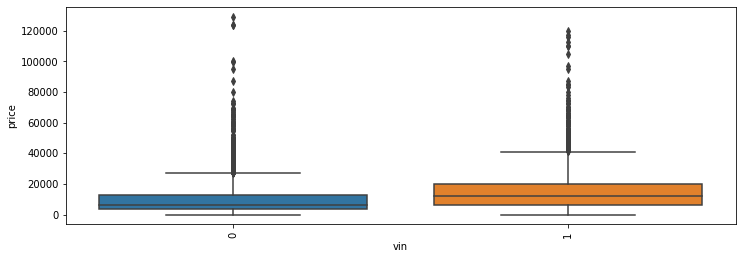

(7688, 2)


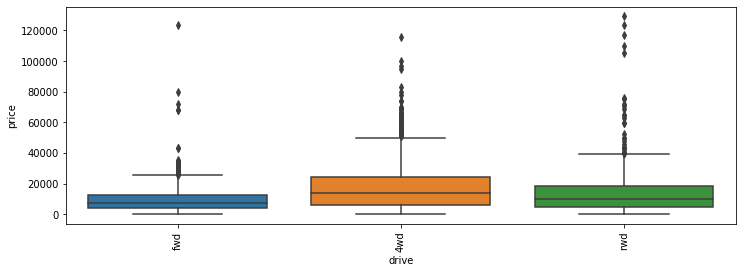

(7744, 2)


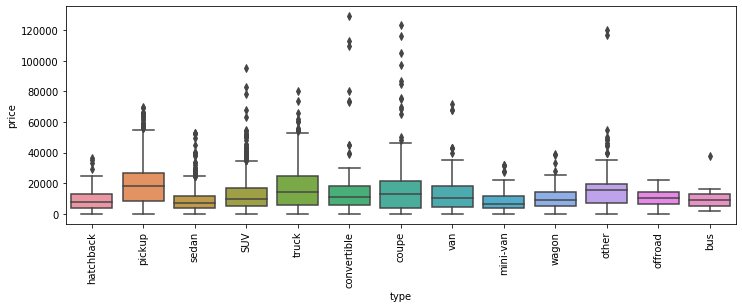

(7277, 2)


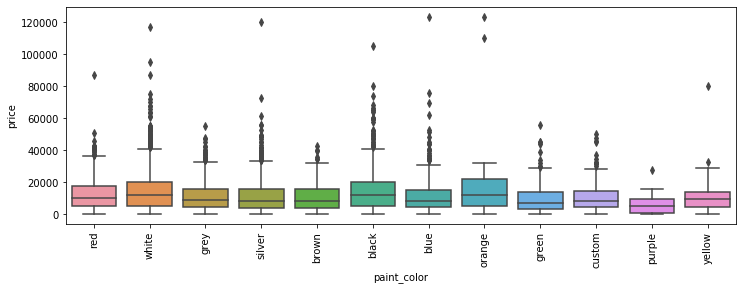

(10725, 2)


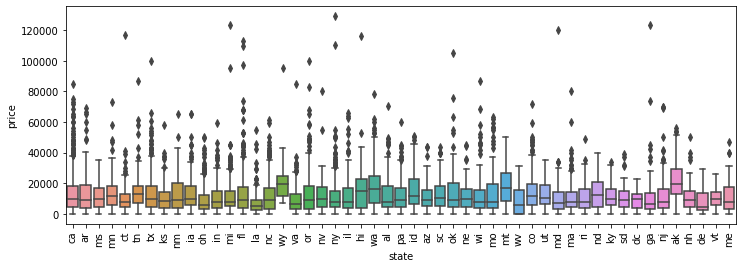

In [20]:
# Price and categorical value
for cat in cat_col:
    temp = df[[cat, 'price']].dropna()
    print(temp.shape)
    fig, ax = plt.subplots(figsize = (12,4))
    g = sns.boxplot(x = cat, y = 'price', data = temp, ax = ax)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

(10705, 2)


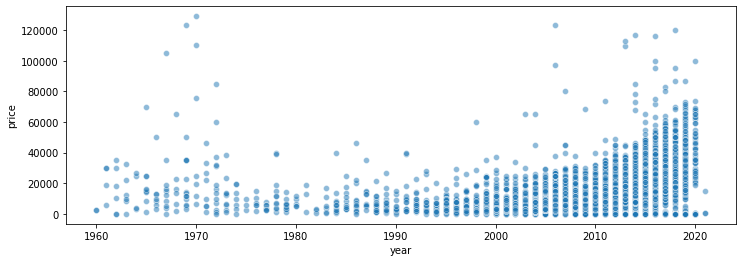

(8755, 2)


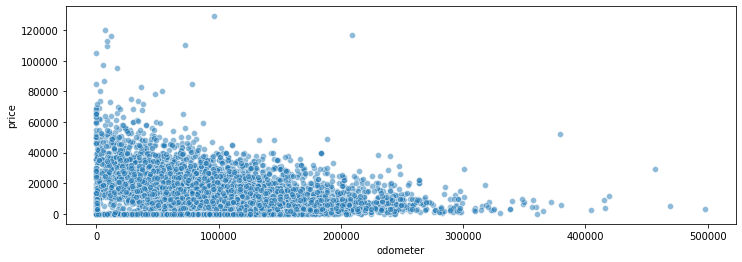

In [21]:
num_col = ['year', 'odometer']
# Price and numeric value
for num in num_col:
    temp = df[[num, 'price']].dropna()
    print(temp.shape)
    fig, ax = plt.subplots(figsize = (12,4))
    g = sns.scatterplot(x = num, y = 'price', data = temp, ax = ax, alpha = 0.5)
    plt.show()

In [22]:
# drop rows with too many nan values , not viable for prediction
drop_rows = df.isnull().sum(axis = 1) >=5
df = df[~drop_rows].reset_index(drop = True)

In [23]:
#drop year 2021
y21 = df[df['year'] ==2021]
df =df.drop(y21.index).reset_index(drop = True)


In [24]:
df.head()

price    year manufacturer condition    cylinders    fuel  odometer  \
0   4999  2007.0       toyota  like new  4 cylinders  hybrid  146000.0   
1  48647  2020.0    chevrolet       NaN          NaN  diesel      19.0   
2  15272  2018.0       subaru       NaN          NaN   other   63580.0   
3  20770  2014.0    chevrolet       NaN          NaN     gas  139000.0   
4  20375  2015.0       toyota       NaN  6 cylinders     gas   73405.0   

  title_status transmission  vin drive       type paint_color state  
0        clean    automatic    1   fwd  hatchback         red    ca  
1        clean    automatic    0   4wd     pickup         NaN    ar  
2        clean        other    0   NaN      sedan       white    ms  
3        clean    automatic    1   NaN     pickup       white    mn  
4        clean    automatic    1   4wd        SUV         NaN    ct

In [25]:
#df['year'] = pd.cut(df['year'],12, labels = np.arange(1,13)).astype('object')

### 2. Preprocessing and baseline model

In [26]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
import category_encoders as ce
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [27]:
target = df['price']
features = df.drop('price', axis = 1)

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          9086 non-null   float64
 1   manufacturer  8808 non-null   object 
 2   condition     5896 non-null   object 
 3   cylinders     6348 non-null   object 
 4   fuel          9049 non-null   object 
 5   odometer      8260 non-null   float64
 6   title_status  9060 non-null   object 
 7   transmission  9038 non-null   object 
 8   vin           9100 non-null   int64  
 9   drive         7645 non-null   object 
 10  type          7705 non-null   object 
 11  paint_color   7233 non-null   object 
 12  state         9100 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 924.3+ KB


In [29]:
# year = ['year']
# odo = ['odometer']
# cat_col = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'vin',
#        'drive', 'type', 'paint_color']
# multicat_col = ['manufacturer', 'state']

In [30]:
# cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
#                      ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

# multicat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
#                      ('te', ce.TargetEncoder())])

# odo_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
#                      ('scaler', StandardScaler())])
# year_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
#                      ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

In [31]:
# ct = ColumnTransformer([('cat', cat_pipe, cat_col), ('multicat', multicat_pipe, multicat_col),
#                        ('year', year_pipe, year),('odo', odo_pipe, odo)])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state = 123)

In [33]:
#function to quickly calculate cv score
def cv_score(pipe, X_train, y_train):
    cv_score_R2 = cross_val_score(pipe, X_train, y_train, cv = 5, n_jobs = -1)
    cv_score_mse = cross_val_score(pipe, X_train, y_train, 
                                   scoring = 'neg_mean_squared_error',cv = 5, n_jobs = -1)
    cv_score_rmse = np.sqrt(np.absolute(cv_score_mse))
    print('Cross val score: R2')
    print(cv_score_R2)
    print(cv_score_R2.mean())
    print('Cross val score: RMSE')
    print(cv_score_rmse)
    print(cv_score_rmse.mean())

#### Try #1: odometer as continuous variable, year as categorical variable

In [34]:
# Try this kind of transformer , quick and simple
odo = ['odometer']
cat_col = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'vin',
       'drive', 'type', 'paint_color','year', 'manufacturer', 'state']

In [35]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
                     ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
odo_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col),
                       ('odo', odo_pipe, odo)])

In [36]:
pipe1 = Pipeline([('transformer', ct),('classifier', LinearRegression())])

In [37]:
cv_score(pipe1, X_train, y_train)

Cross val score: R2
[0.3806369  0.4410948  0.32718993 0.41462117 0.37486936]
0.3876824328725116
Cross val score: RMSE
[9323.01235258 8428.61740485 9954.28767022 8525.02696657 9651.6912966 ]
9176.527138163174


##### Conclude for try #1: Basic model have a low R2 score(0.38) and high RMSE score (9176)

### Task 3: Feature engineering

In [38]:
# Try cross_validate
# cross_val = cross_validate(pipe, X_train, y_train, cv = 5, n_jobs = -1,  
#                            return_train_score=True, scoring = 'neg_mean_squared_error')
# res = pd.DataFrame(cross_val)
# res

In [39]:
# # This snippet works

# #Create smaller subset
# X2 = features.loc[2015:2030,['year','manufacturer','drive', 'odometer']]
# y2 = target.loc[2015:2030]

# #Done
# cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
#                      ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
# #Problem with target encoder
# multicat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
#                      ('te', ce.TargetEncoder())])
# # using odo.reshape(-1,1)?
# odo_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
#                      ('scaler', StandardScaler())])

# # work , change df['year'] to object and reshape year
# year_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
#                      ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

# cat1 = ['year', 'manufacturer', 'drive']
# odo1 = ['odometer']

# #Create columntransformer, pipe and fit
# ct = ColumnTransformer([('cat', cat_pipe, cat1),('odo', odo_pipe, odo1)])
# pipe = Pipeline([('transformer', ct),('classifier', LinearRegression())])
# #pipe.fit(X2, y2)

#### Try #2: Odometer and year as continuous variable

In [40]:
num_col = ['odometer', 'year']
cat_col = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'vin',
       'drive', 'type', 'paint_color','year', 'manufacturer', 'state']

In [41]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
                     ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col),
                       ('num', num_pipe, num_col)])

In [42]:
pipe2 = Pipeline([('transformer', ct), ('classifier', LinearRegression())])


In [43]:
cv_score(pipe2, X_train, y_train)

Cross val score: R2
[0.38122455 0.44133215 0.32719514 0.37925793 0.3701815 ]
0.3798382557075091
Cross val score: RMSE
[9318.5884847  8426.82750174 9954.24909522 8778.75336183 9687.81273252]
9233.246235202561


##### Conclude for try #2: Still low R2(0.379) and high RMSE

#### Try #3: Encode nan in feature as unknown, impute continuous variable with KNN Imputer

In [44]:
features_3 = features.copy()

In [45]:
cat_col =  ['manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color',
       'state']
num_col = ['year', 'odometer']

In [46]:
# Cat var: encode nan as unknown, Num var: KNNImputer
features_3[cat_col] = features_3[cat_col].fillna('unknown')
features_3['odometer'] = features_3['odometer'].replace(0, np.nan)

In [47]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features_3,target, test_size=0.2,random_state = 123)

In [48]:
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', KNNImputer()), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col),
                       ('num', num_pipe, num_col)])

In [49]:
pipe3 = Pipeline([('transformer', ct), ('classifier', LinearRegression())])

In [50]:
cv_score(pipe3, X_train3, y_train3)

Cross val score: R2
[0.32534144 0.41817558 0.29387953 0.38394176 0.35473369]
0.355214398383651
Cross val score: RMSE
[ 9730.28624348  8599.69875564 10197.72613846  8745.57045442
  9805.9014939 ]
9415.836617180998


##### Conclude for try #3: Encode nan as unknown : even worse R2(0.355)

#### Try #4: Using TargetEncoder # Fail for now

In [51]:
features_4 = features.copy()
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_4,target, test_size=0.2,random_state = 123)

In [52]:
outer_cv = ShuffleSplit(5)
score = []
for training_samples, test_samples in outer_cv.split(X_train4, y_train4):
    Xtrain, ytrain = X_train4.iloc[training_samples], y_train4.iloc[training_samples]
    Xtest, ytest = X_train4.iloc[test_samples], y_train4.iloc[test_samples]
    
    cat_col =  ['condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color', 'year']
    num_col = ['odometer']
    multi_col = ['state', 'manufacturer']
    
    cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')),\
                         ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
    num_pipe = Pipeline([('impute', KNNImputer()), \
                     ('scaler', StandardScaler())])
#     multi_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
#                      ('te', ce.TargetEncoder()), ('scaler', StandardScaler)])

    cat_t = cat_pipe.fit_transform(Xtrain[cat_col]).toarray()
    num_t = num_pipe.fit_transform(Xtrain[num_col])
    
    multi_t = SimpleImputer(strategy = 'most_frequent').fit_transform(Xtrain[multi_col])
    multi_t = ce.TargetEncoder().fit_transform(multi_t, ytrain)
    multi_t = StandardScaler().fit_transform(multi_t)
    
    ytrain_new = StandardScaler().fit_transform(ytrain.values.reshape(-1,1)).reshape(-1)
    Xtrain_new = np.concatenate([cat_t, num_t, multi_t], axis = 1)
    clf = LinearRegression()
#     clf.fit(Xtrain_new, ytrain_new)

##### Conclude for try #4: Target encoder not align with sklearn API

#### Try #5: cross validate for each feature with the target.

In [53]:
features_5 = features.copy()
X_train5, X_test5, y_train5, y_test5 = train_test_split(features_5,target, test_size=0.2,random_state = 123)

In [54]:
cat_col =  ['condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color', 'state', 'manufacturer']
num_col = ['odometer', 'year']


In [55]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')),\
                         ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

In [56]:
score_cat = []
for col in cat_col:
    X_temp = X_train5[[col]]
    y_temp = y_train5
    cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')),\
                         ('ohe', OneHotEncoder(handle_unknown = 'ignore')), ('classifier', LinearRegression())])
    s = cross_val_score(cat_pipe, X_temp, y_temp, cv = 5)
    score_cat.append((col, s.mean()))
print(score_cat)
print(len(score_cat))

[('condition', 0.01669135593038029), ('cylinders', 0.04135269337074232), ('fuel', 0.07115734134337878), ('title_status', 0.00210815437295333), ('transmission', 0.007261501658116454), ('vin', 0.02499774000619661), ('drive', 0.05450550568127965), ('type', 0.07751181051214873), ('paint_color', 0.008048862799764422), ('state', 0.026600137364928233), ('manufacturer', 0.05575913220222974)]
11


In [57]:
score_cat2 = [x for x in score_cat if x[1]>=0.01]
print(score_cat2)
print(len(score_cat2))

[('condition', 0.01669135593038029), ('cylinders', 0.04135269337074232), ('fuel', 0.07115734134337878), ('vin', 0.02499774000619661), ('drive', 0.05450550568127965), ('type', 0.07751181051214873), ('state', 0.026600137364928233), ('manufacturer', 0.05575913220222974)]
8


In [58]:
score_num = []
for col in num_col:
    X_temp = X_train5[[col]]
    y_temp = y_train5
    num_pipe = Pipeline([('impute', KNNImputer()), \
                     ('scaler', StandardScaler()), ('classifier', LinearRegression())])
    s = cross_val_score(num_pipe, X_temp, y_temp, cv = 5)
    score_num.append((col, s.mean()))
print(score_num)

[('odometer', 0.11626699798019242), ('year', 0.07260408524398862)]


In [59]:
#Only choose some features that has cv score > 0.01
cat_col2 = [x[0] for x in score_cat2]
num_col2 = [x[0] for x in score_num]


In [60]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
                     ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col2),
                       ('num', num_pipe, num_col2)])

In [61]:
pipe5 = Pipeline([('transformer', ct),('classifier', LinearRegression())])

In [62]:
features52 = pd.concat([features[cat_col2], features[num_col2]], axis = 1)

In [63]:
X_train52, X_test52, y_train52, y_test52 = train_test_split(features52,target, test_size=0.2,random_state = 123)

In [64]:
cv_score(pipe5, X_train52, y_train52)

Cross val score: R2
[0.29399165 0.39770697 0.25580614 0.37195733 0.34068241]
0.3320289000165134
Cross val score: RMSE
[ 9953.79097977  8749.66017068 10469.0430525   8830.22624651
  9912.09282045]
9582.962653982613


##### Conclude for try #5: reduce number of features won't help . cvscore R2: 0.33


#### Try # 6: Try the same dataset with some different non linear algorithm

In [65]:
features6 = features.copy()
features6.head()

year manufacturer condition    cylinders    fuel  odometer title_status  \
0  2007.0       toyota  like new  4 cylinders  hybrid  146000.0        clean   
1  2020.0    chevrolet       NaN          NaN  diesel      19.0        clean   
2  2018.0       subaru       NaN          NaN   other   63580.0        clean   
3  2014.0    chevrolet       NaN          NaN     gas  139000.0        clean   
4  2015.0       toyota       NaN  6 cylinders     gas   73405.0        clean   

  transmission  vin drive       type paint_color state  
0    automatic    1   fwd  hatchback         red    ca  
1    automatic    0   4wd     pickup         NaN    ar  
2        other    0   NaN      sedan       white    ms  
3    automatic    1   NaN     pickup       white    mn  
4    automatic    1   4wd        SUV         NaN    ct

In [66]:
cat_col =  ['condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive', 'type', 'paint_color', 'state', 'manufacturer']
num_col = ['odometer', 'year']


In [67]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
                     ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col),
                       ('num', num_pipe, num_col)])

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

rf = RandomForestRegressor()
nb =  GaussianNB()
knn = KNeighborsRegressor()
svm = SVR()
ada = AdaBoostRegressor()

algo = [rf, nb,knn,svm, ada]


In [69]:
X_train6, X_test6, y_train6, y_test6 = \
train_test_split(features6,target, test_size=0.2,random_state = 123)

In [70]:
for a in algo:
    print(a)
    pipe6 = Pipeline([('transformer', ct), ('classifier', a)])
    cv_score(pipe6, X_train6, y_train6)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Cross val score: R2
[0.44765225 0.5094771  0.45227432 0.51487223 0.41879966]
0.4686151129198798
Cross val score: RMSE
[8805.60945492 7952.35596173 8926.61641218 7790.76825438 9197.92551271]
8534.65511917983
GaussianNB(priors=None, var_smoothing=1e-09)


C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Cross val score: R2
[nan nan nan nan nan]
nan
Cross val score: RMSE
[nan nan nan nan nan]
nan
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Cross val score: R2
[0.35828857 0.42733856 0.42505706 0.4350144  0.38362482]
0.40586468351408894
Cross val score: RMSE
[9489.72187726 8531.71294973 9201.87476888 8375.2146003  9583.8630786 ]
9036.47745495399
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Cross val score: R2
[-0.05120616 -0.04613751 -0.04293645 -0.03216825 -0.04451467]
-0.04339260927125741
Cross val score: RMSE
[12145.8397301  11531.38981774 12393.46851724 11320.15840668
 12475.99816209]
11973.37092676766
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
Cross val score: 

##### Conlude for try #6 : RandomForest seems to be a good classifier. Should do more feature engineering. 
Why does Adaboost give bad result? And GaussianNB produce nan?
- RandomForest: R2(0.468), RMSE(8534)
- GaussianNB: nan
- KNN: R2(0.4), RMSE(9036)
- SVM with RBF kernel: R2(-0.04), RMSE(11973)
- Adaboost: R2(-0.25), RMSE(13902)

#### Try#7: use CountEncoding, TargetEncoding

In [71]:
import category_encoders as ce

In [72]:
features7 = features.copy()
features7.head()

year manufacturer condition    cylinders    fuel  odometer title_status  \
0  2007.0       toyota  like new  4 cylinders  hybrid  146000.0        clean   
1  2020.0    chevrolet       NaN          NaN  diesel      19.0        clean   
2  2018.0       subaru       NaN          NaN   other   63580.0        clean   
3  2014.0    chevrolet       NaN          NaN     gas  139000.0        clean   
4  2015.0       toyota       NaN  6 cylinders     gas   73405.0        clean   

  transmission  vin drive       type paint_color state  
0    automatic    1   fwd  hatchback         red    ca  
1    automatic    0   4wd     pickup         NaN    ar  
2        other    0   NaN      sedan       white    ms  
3    automatic    1   NaN     pickup       white    mn  
4    automatic    1   4wd        SUV         NaN    ct

In [73]:
cat_col =  ['condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive','type', 'paint_color']
multicat_col = ['state', 'manufacturer']
num_col = ['odometer', 'year']


In [74]:
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), \
                     ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

cat_trans = cat_pipe.fit_transform(features7[cat_col]).toarray()
num_trans = num_pipe.fit_transform(features7[num_col])
f7 = np.concatenate([cat_trans, num_trans], axis = 1)
f7.shape

(9100, 60)

In [75]:
mul1 = SimpleImputer(strategy = 'most_frequent')\
        .fit_transform(features7[multicat_col])
# print(type(mul1))
# print(mul1)
mul2 = ce.CountEncoder().fit_transform(mul1)
# print(mul2)
# print(type(mul2))
mul3 = StandardScaler().fit_transform(mul2)
f72  = np.concatenate([f7, mul3], axis = 1)
f72.shape

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\category_encoders\count.py:255: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  X.loc[:, self.cols] = X.fillna(value=pd.np.nan)


(9100, 62)

In [76]:
X_train7, X_test7, y_train7, y_test7 = \
train_test_split(f72,target, test_size=0.2,random_state = 123)

In [77]:
linreg = LinearRegression()
cv_score_R2 = cross_val_score(linreg, X_train7, y_train7, cv = 5, n_jobs = -1)
cv_score_mse = cross_val_score(linreg, X_train7, y_train7,\
                               scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
print(cv_score_R2.mean())
print(np.abs(cv_score_mse).mean())

0.3256200699214902
93156794.40824176


In [78]:
# Use Category encoder

In [79]:
mul1 = SimpleImputer(strategy = 'most_frequent')\
        .fit_transform(features7[multicat_col])
# print(type(mul1))
# print(mul1)
mul2 = ce.TargetEncoder().fit_transform(mul1, target)
# print(mul2)
# print(type(mul2))
mul3 = StandardScaler().fit_transform(mul2)
# print(mul3)
f73  = np.concatenate([f7, mul3], axis = 1)


In [80]:
X_train7, X_test7, y_train7, y_test7 = \
train_test_split(f73,target, test_size=0.2,random_state = 123)

In [81]:
linreg = LinearRegression()
cv_score_R2 = cross_val_score(linreg, X_train7, y_train7, cv = 5, n_jobs = -1)
cv_score_mse = cross_val_score(linreg, X_train7, y_train7,\
                               scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
print(cv_score_R2.mean())
print(np.abs(cv_score_mse).mean())


0.3417266181258911
90987689.52032967


#### Try #8: categorical value interaction


In [142]:
import itertools

In [143]:
features8 = features.copy()
features8['vin'] = features8['vin'].astype('str')
features8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          9086 non-null   float64
 1   manufacturer  8808 non-null   object 
 2   condition     5896 non-null   object 
 3   cylinders     6348 non-null   object 
 4   fuel          9049 non-null   object 
 5   odometer      8260 non-null   float64
 6   title_status  9060 non-null   object 
 7   transmission  9038 non-null   object 
 8   vin           9100 non-null   object 
 9   drive         7645 non-null   object 
 10  type          7705 non-null   object 
 11  paint_color   7233 non-null   object 
 12  state         9100 non-null   object 
dtypes: float64(2), object(11)
memory usage: 924.3+ KB


In [144]:
cat = [col for col in features8.columns if features8[col].dtype == 'object']

features8[cat] = features8[cat].fillna('unknown')


In [145]:
interactions = pd.DataFrame(index = features8.index)
pairs = itertools.combinations(cat,2)
for p1,p2 in pairs:
    new_col_name = '_'.join([p1,p2])
    new_values = features8[p1].map(str) + '_' + features8[p2].map(str)
    interactions[new_col_name] = new_values
#     le = LabelEncoder()
#     interactions[new_col_name] = le.fit_transform(new_values)

f8 = features8.join(interactions) 

In [146]:
f8.head()

year manufacturer condition    cylinders    fuel  odometer title_status  \
0  2007.0       toyota  like new  4 cylinders  hybrid  146000.0        clean   
1  2020.0    chevrolet   unknown      unknown  diesel      19.0        clean   
2  2018.0       subaru   unknown      unknown   other   63580.0        clean   
3  2014.0    chevrolet   unknown      unknown     gas  139000.0        clean   
4  2015.0       toyota   unknown  6 cylinders     gas   73405.0        clean   

  transmission vin    drive  ...  vin_drive     vin_type vin_paint_color  \
0    automatic   1      fwd  ...      1_fwd  1_hatchback           1_red   
1    automatic   0      4wd  ...      0_4wd     0_pickup       0_unknown   
2        other   0  unknown  ...  0_unknown      0_sedan         0_white   
3    automatic   1  unknown  ...  1_unknown     1_pickup         1_white   
4    automatic   1      4wd  ...      1_4wd        1_SUV       1_unknown   

  vin_state      drive_type drive_paint_color drive_state type_paint_color  \
0      1_ca   fwd_hatchback           fwd_red      fwd_ca    hatchback_red   
1      0_ar      4wd_pickup       4wd_unknown      4wd_ar   pickup_unknown   
2      0_ms   unknown_sedan     unknown_white  unknown_ms      sedan_white   
3      1_mn  unknown_pickup     unknown_white  unknown_mn     pickup_white   
4      1_ct         4wd_SUV       4wd_unknown      4wd_ct      SUV_unknown   

     type_state paint_color_state  
0  hatchback_ca            red_ca  
1     pickup_ar        unknown_ar  
2      sedan_ms          white_ms  
3     pickup_mn          white_mn  
4        SUV_ct        unknown_ct  

[5 rows x 68 columns]

In [147]:
# This is gonna leak, but test it first


In [148]:
X_train8, X_test8, y_train8, y_test8 = \
train_test_split(f8,target, test_size=0.2,random_state = 123)

In [157]:
categories = f8.dtypes == 'object'
cat_col = f8.columns[categories]
num_col = f8.columns[~categories]


Index(['year', 'odometer'], dtype='object')

In [164]:
# train_set = np.empty(X_train8[cat_col].shape)
# test_set = np.empty(X_test8[cat_col].shape)

In [172]:
# Fail for LabelEncoder due to unseen value in test set
# i = 0
# for col in cat_col: 
#     enc = LabelEncoder()
#     temp_train_col = enc.fit_transform(X_train8[col])
#     train_set[:,i] =temp_train_col
#     temp_test_col = enc.transform(X_test8[col])
#     test_set[:,i] =temp_test_col
#     i +=1
    
# print(train_set)

In [173]:
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
num_pipe = Pipeline([('impute', SimpleImputer(strategy = 'median')), \
                     ('scaler', StandardScaler())])

ct = ColumnTransformer([('cat', cat_pipe, cat_col),
                       ('num', num_pipe, num_col)])

In [174]:
pipe8 = Pipeline([('transformer', ct),('classifier', LinearRegression())])

In [175]:
#cv_score(pipe8, X_train8, y_train8)

Cross val score: R2
[ -4.99998713 -54.72123785  -2.56521468  -5.92437516  -6.11724797]
-14.865612558257908
Cross val score: RMSE
[29017.41740136 84158.43356516 22914.31022173 29320.24202068
 32566.72434281]
39595.4255103485


#### Result of try#8: even worse R2(-14), RMSE(39595)